In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


df = pd.read_csv('C:\\Users\\joaov\\UFRJ\\2025.1\\IML\\Trabalho Final\\Trabalho-Final---IML\\Dry_Bean.csv')

In [3]:
df.shape

(13611, 17)

In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [6]:
print(df.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


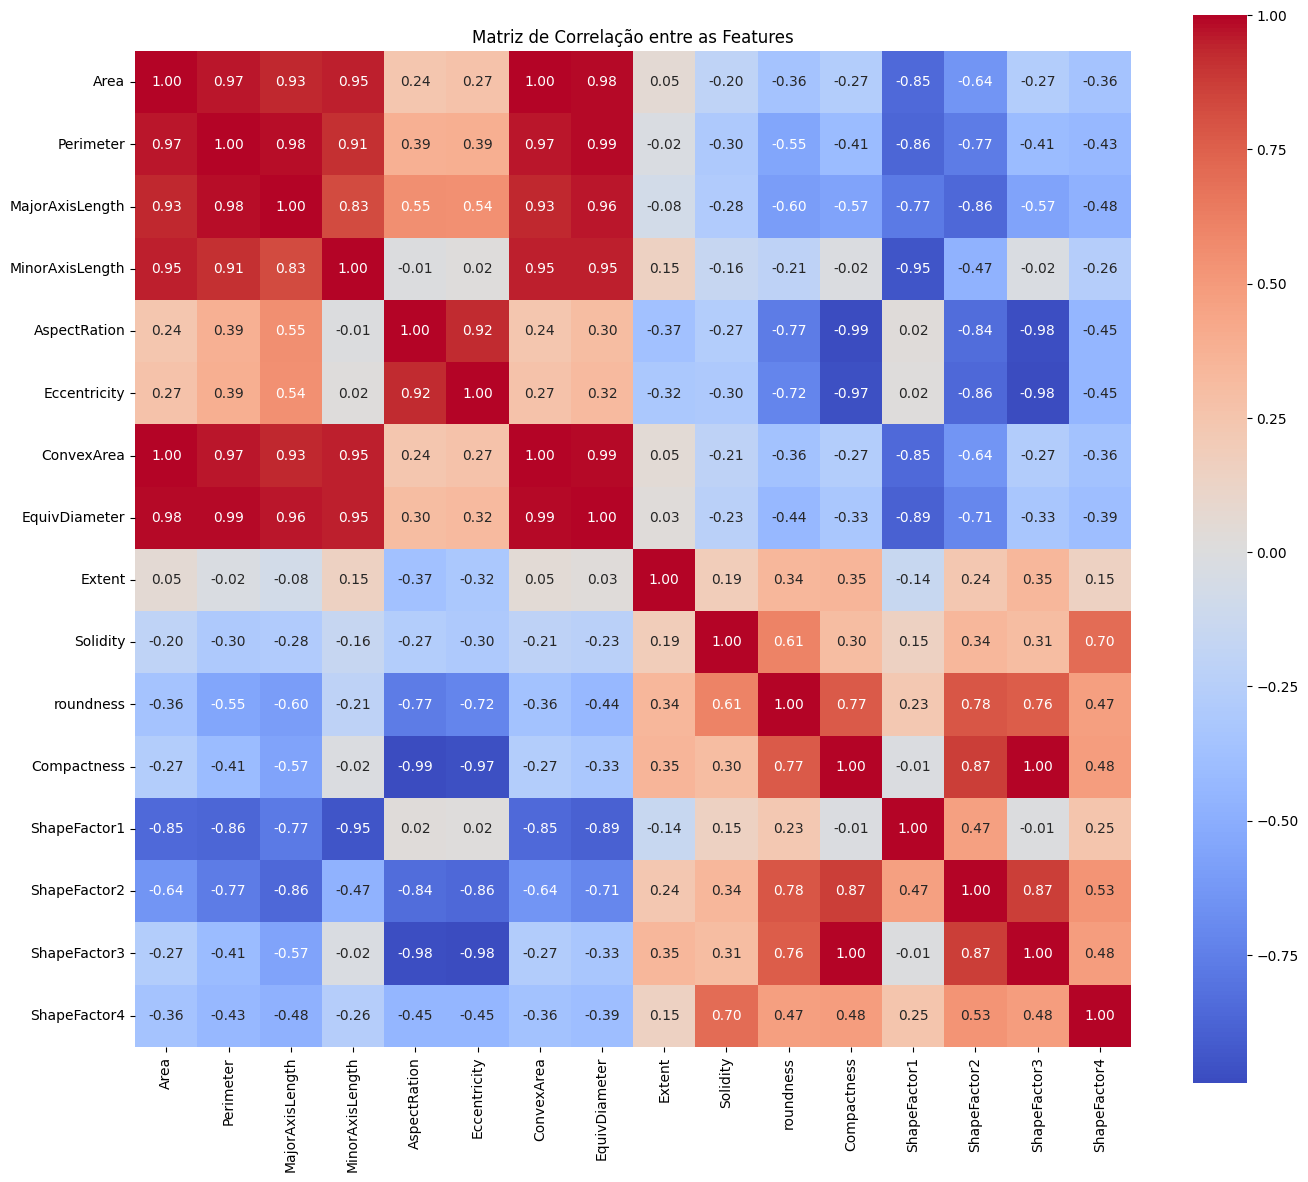

In [7]:
#PréProcessamento do dataset

'''
Analisando a correlação entre as features. É possível ver algumas que até parecem ser redundantes, mas só iremos remover features com base nos resultados do Mutual Information.
Essa decisão pode implicar em problemas de desempenho no SVM Linear por conta da alta colinearidade.
'''

corr_matrix = df.drop(columns=["Class"]).corr()

plt.figure(figsize=(14, 12))  # define o tamanho do gráfico
sns.heatmap(
    corr_matrix,
    annot=True,         # mostra os valores numéricos
    fmt=".2f",          # formato dos números
    cmap="coolwarm",    # cores do gradiente
    square=True,        # células quadradas
    cbar=True           # barra de cores à direita
)
plt.title("Matriz de Correlação entre as Features")
plt.tight_layout()
plt.show()

In [5]:
#PréProcessamento do dataset

from sklearn.feature_selection import mutual_info_classif

'''
Temos uma varíavel alvo categórica, ou seja, aplicar métodos de correlação como as matrizes de correlação com método de Pearson,
não seria muito favorável. Pensando nisso, vamos aplicar a Mutual information para entender o quanto mudanças nas features alteram
a variável alvo.
'''

X = df.drop(columns=["Class"])
y = df["Class"]

# mutual_info = mutual_info_classif(X, y)
# mutual_info = pd.Series(mutual_info)
# mutual_info.index = X.columns
# mutual_info.sort_values(ascending=False)

mi = mutual_info_classif(X, y, random_state=42)
mi_df = (pd.DataFrame({"Feature": X.columns, "Mutual_Info": mi})
         .sort_values("Mutual_Info", ascending=False))
print(mi_df)

'''
Iremos remover as features que apresentarem valor menor que 0.30 (30%)!
'''
X = df.drop(columns = ["Class", "Solidity", "Extent"])

            Feature  Mutual_Info
1         Perimeter     1.056907
6        ConvexArea     1.038620
7     EquivDiameter     1.037142
0              Area     1.036810
2   MajorAxisLength     0.996402
13     ShapeFactor2     0.954653
12     ShapeFactor1     0.931138
3   MinorAxisLength     0.928023
11      Compactness     0.835597
14     ShapeFactor3     0.835584
5      Eccentricity     0.819633
4      AspectRation     0.819608
10        roundness     0.799560
15     ShapeFactor4     0.366561
9          Solidity     0.234156
8            Extent     0.198974


In [6]:
#PréProcessamento do dataset

outliers_por_feature = {}

for feature in X.columns:
  #Calculando primeiro e terceiro quartil:
  Q1 = X[feature].quantile(0.25)
  Q3 = X[feature].quantile(0.75)

  #IQR
  IQR = Q3 - Q1

  #Limites
  inferior = Q1 - 1.5*IQR
  superior = Q3 + 1.5*IQR

  #Outliers
  isOutlier = (X[feature]<inferior) | (X[feature]>superior)

  #Armazenando outliers e seus índices
  outliers = X[feature][isOutlier]

  outliers_por_feature[feature] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': inferior,
        'Upper_Bound': superior,
        'Outliers_Count': len(outliers),
        'Outliers_Values': outliers.tolist(), # Convertendo para lista para visualização
        'Outliers_Indices': outliers.index.tolist() # Índices das linhas dos outliers
    }

for feature, data in outliers_por_feature.items():
    print(f"--- Feature: {feature} ---")
    print(f"  Q1: {data['Q1']:.2f}")
    print(f"  Q3: {data['Q3']:.2f}")
    print(f"  IQR: {data['IQR']:.2f}")
    print(f"  Limite Inferior: {data['Lower_Bound']:.2f}")
    print(f"  Limite Superior: {data['Upper_Bound']:.2f}")
    print(f"  Total de Outliers: {data['Outliers_Count']}")
    if data['Outliers_Count'] > 0:
        print(f"  Valores dos Outliers: {data['Outliers_Values']}")
        print(f"  Índices dos Outliers: {data['Outliers_Indices']}")
    print("\n")

--- Feature: Area ---
  Q1: 36328.00
  Q3: 61332.00
  IQR: 25004.00
  Limite Inferior: -1178.00
  Limite Superior: 98838.00
  Total de Outliers: 551
  Valores dos Outliers: [100846, 102015, 102379, 105542, 115967, 114004, 117034, 126503, 128118, 129409, 129807, 130070, 131249, 131488, 132254, 132399, 132851, 132889, 133760, 134012, 134251, 135222, 135403, 135898, 137075, 137115, 137358, 137518, 137748, 137890, 138059, 138114, 138244, 138265, 138659, 138777, 138976, 139523, 139639, 139686, 139841, 140313, 140867, 140964, 141385, 141519, 141850, 141953, 142154, 142238, 142399, 142592, 143603, 144058, 144079, 144083, 144404, 144458, 144704, 145163, 145285, 145339, 145886, 146007, 146015, 146153, 146154, 146328, 146521, 146618, 146862, 146976, 147030, 147044, 147218, 147288, 147827, 147930, 148325, 148827, 148931, 149231, 149264, 149462, 149824, 149941, 150168, 150169, 150467, 150648, 150664, 150738, 151012, 151014, 151091, 151590, 151876, 152063, 152089, 152533, 152816, 152869, 152884, 15

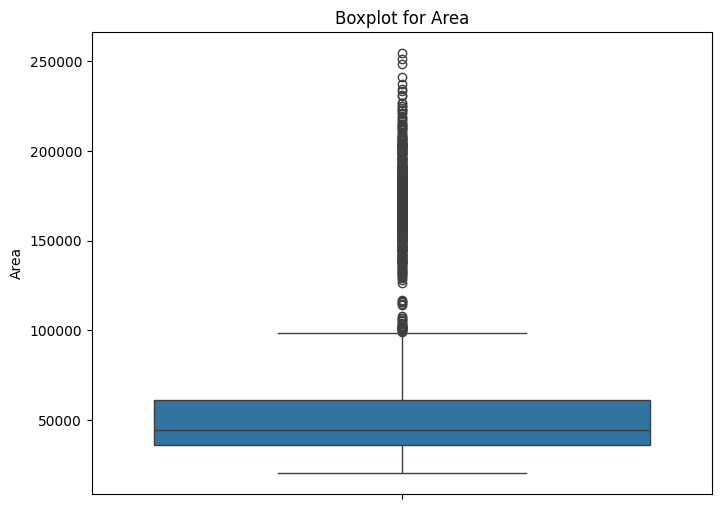

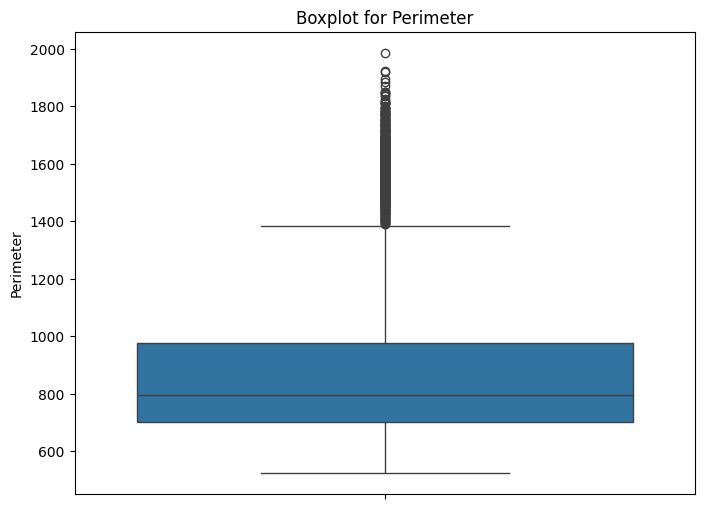

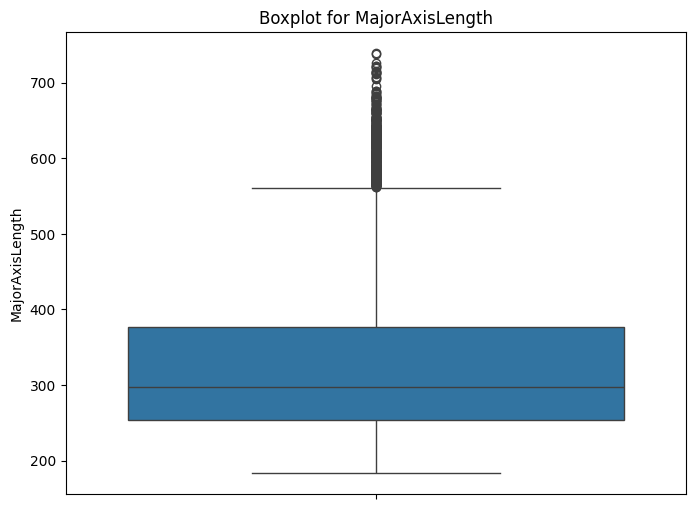

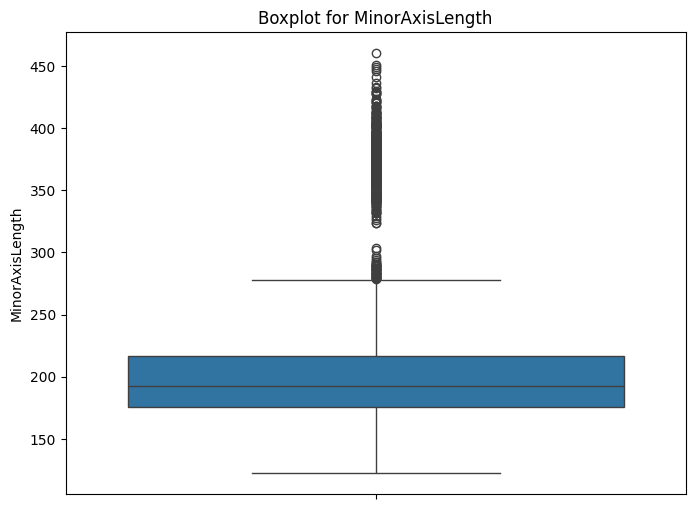

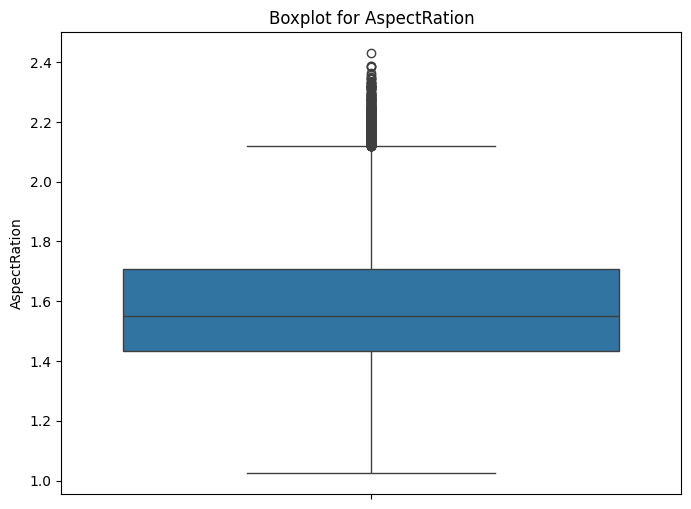

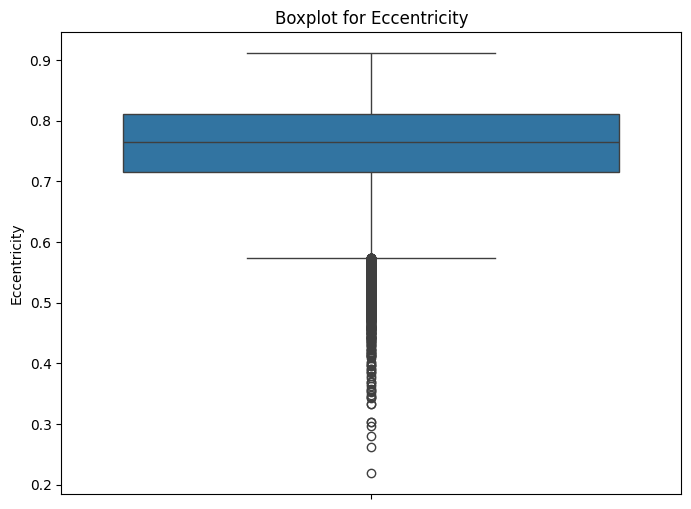

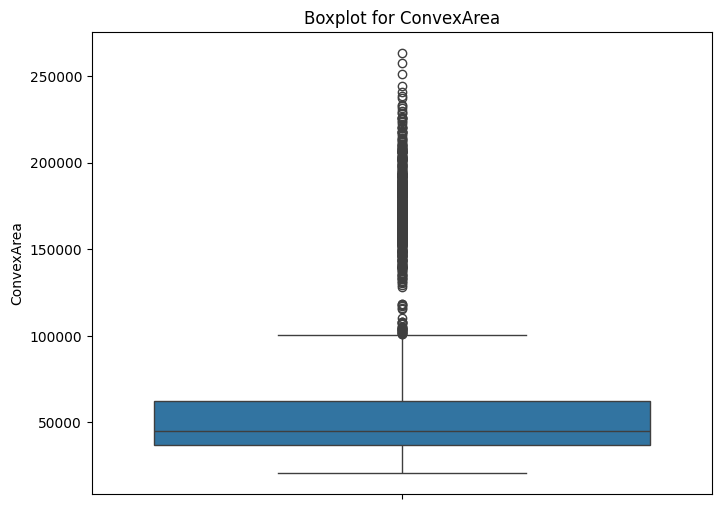

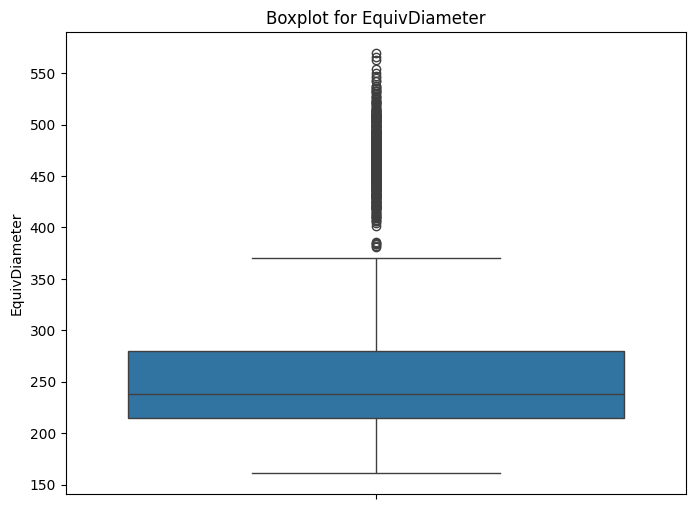

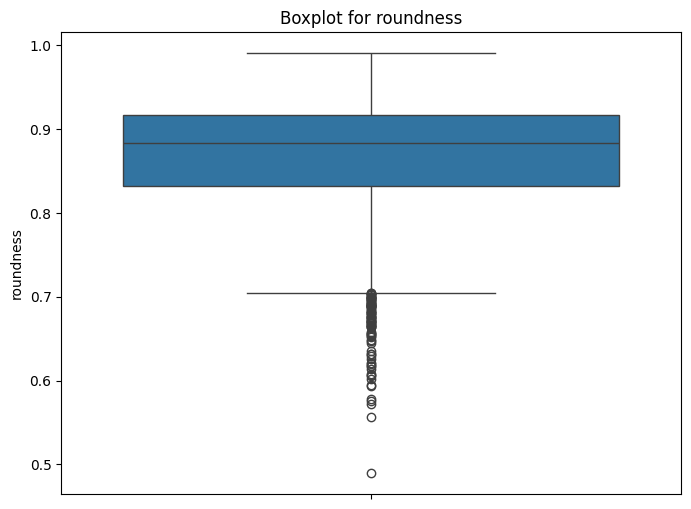

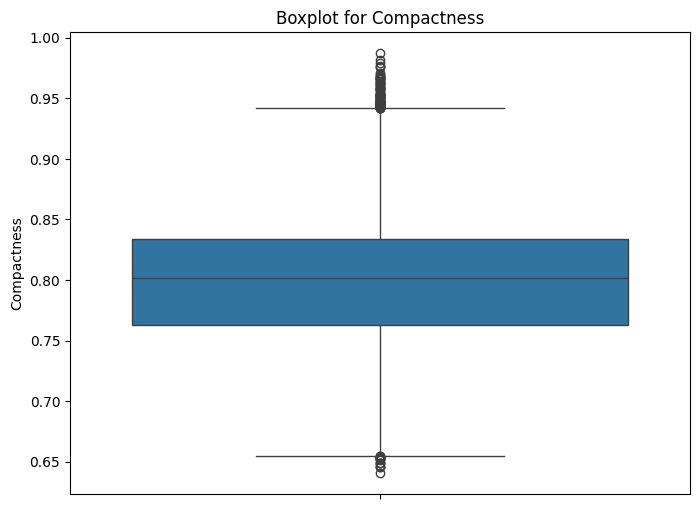

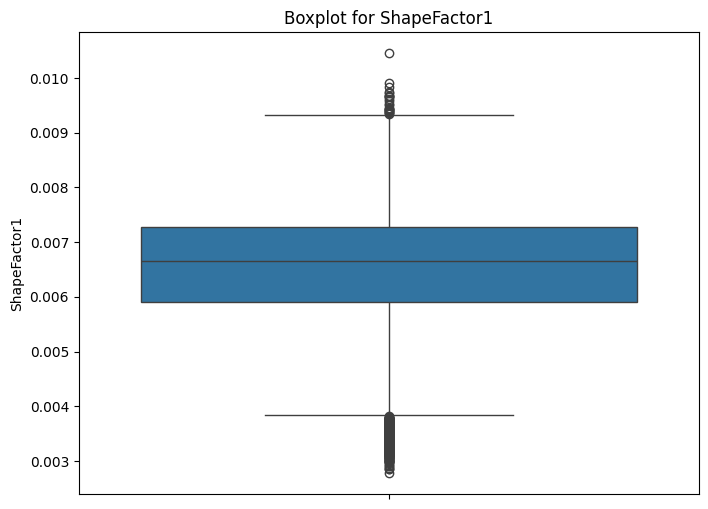

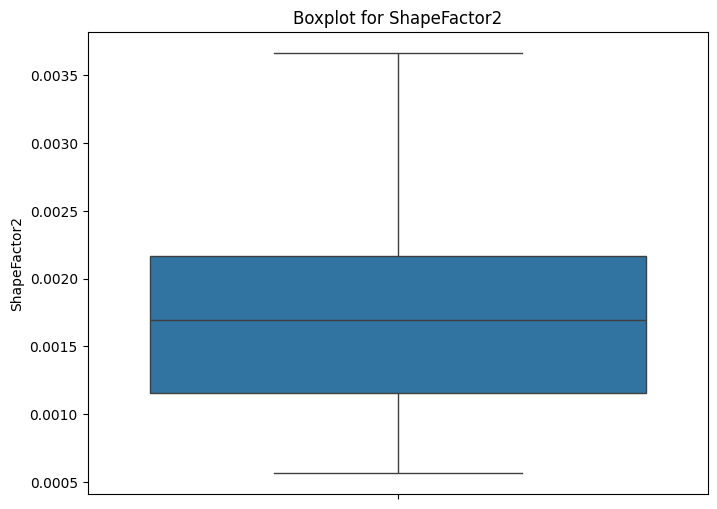

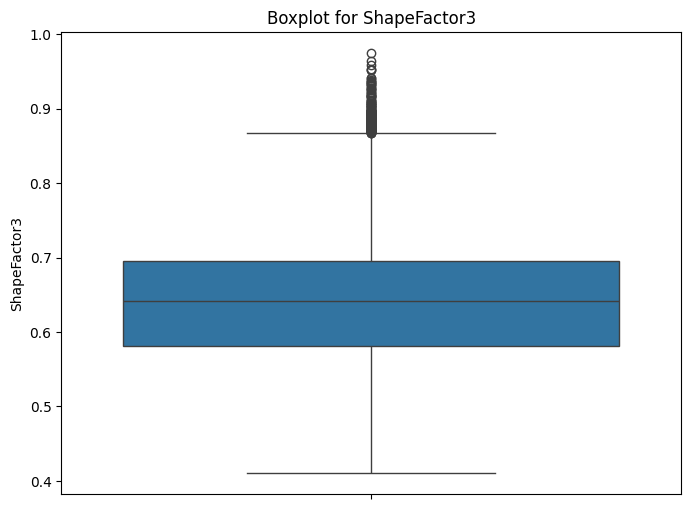

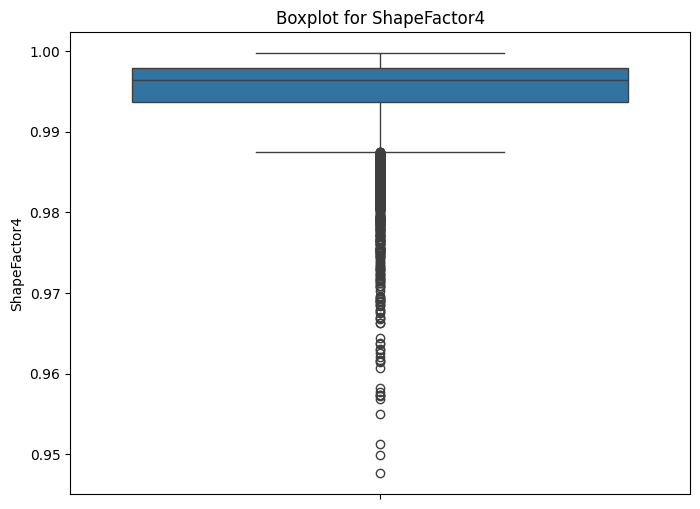

In [7]:
# prompt: Quero gerar boxplots para cada feature. FEITO POR IA!!

import matplotlib.pyplot as plt
# Generating boxplots for each feature
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=X[feature])
    plt.title(f'Boxplot for {feature}')
    plt.ylabel(feature)
    plt.show()


In [8]:
'''
Uma vez com os outliers identificados, vamos removê-los
'''

for feature in X.columns:
  Q1 = X[feature].quantile(0.25)
  Q3 = X[feature].quantile(0.75)
  IQR = Q3-Q1
  inferior = Q1 - 1.5*IQR
  superior = Q3 + 1.5*IQR

  X = X[(X[feature] >= inferior) & (X[feature] <= superior)].copy()

print(X.shape)
y = y.loc[X.index]
print(y.shape)

(10874, 14)
(10874,)


In [12]:
'''
Uma vez que limpamos os outliers, vamos aplicar o primeiro modelo de Redes Neurais.
'''
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

results = []

execs = 30

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

for exe in range(execs):
    cv_skf = StratifiedKFold(n_splits=10, shuffle=True)

    mlp = MLPClassifier(max_iter=1000, solver='adam', activation='relu')

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for fold, (train_index, test_index) in enumerate(cv_skf.split(X_scaled, y_encoded)):
      X_train, X_test = X_scaled[train_index], X_scaled[test_index]
      y_train, y_test = y_encoded[train_index], y_encoded[test_index]

      mlp.fit(X_train, y_train)

      y_pred = mlp.predict(X_test)

      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred, average='weighted')
      recall = recall_score(y_test, y_pred, average='weighted')
      f1 = f1_score(y_test, y_pred, average='weighted')

      results.append({
            'Exec': exe+1,
            'Fold': fold+1,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })
      print(f"Exec {exe+1}, Fold {fold+1}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")
      
results_df = pd.DataFrame(results)

csv_filename = 'mlp_results_30_execs.csv'
results_df.to_csv(csv_filename, index=False)

print(f"\nResultado por folds salvo em '{csv_filename}'")

Exec 1, Fold 1: Accuracy=0.9090, Precision=0.9109, Recall=0.9090, F1=0.9095
Exec 1, Fold 2: Accuracy=0.9283, Precision=0.9288, Recall=0.9283, F1=0.9284
Exec 1, Fold 3: Accuracy=0.9090, Precision=0.9091, Recall=0.9090, F1=0.9084
Exec 1, Fold 4: Accuracy=0.9200, Precision=0.9210, Recall=0.9200, F1=0.9202
Exec 1, Fold 5: Accuracy=0.9117, Precision=0.9124, Recall=0.9117, F1=0.9115
Exec 1, Fold 6: Accuracy=0.9052, Precision=0.9051, Recall=0.9052, F1=0.9051
Exec 1, Fold 7: Accuracy=0.9006, Precision=0.9006, Recall=0.9006, F1=0.9004
Exec 1, Fold 8: Accuracy=0.9227, Precision=0.9229, Recall=0.9227, F1=0.9228
Exec 1, Fold 9: Accuracy=0.9292, Precision=0.9294, Recall=0.9292, F1=0.9289
Exec 1, Fold 10: Accuracy=0.9117, Precision=0.9124, Recall=0.9117, F1=0.9117
Exec 2, Fold 1: Accuracy=0.9219, Precision=0.9219, Recall=0.9219, F1=0.9215
Exec 2, Fold 2: Accuracy=0.9191, Precision=0.9197, Recall=0.9191, F1=0.9192
Exec 2, Fold 3: Accuracy=0.9228, Precision=0.9237, Recall=0.9228, F1=0.9229
Exec 2, Fol

In [14]:
'''
Uma vez que limpamos os outliers, vamos aplicar o primeiro modelo de SVM.
'''

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

results = []

execs = 30

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

for exe in range(execs):
    print(f"-- Execução {exe+1}/{execs}")

    cv_skf = StratifiedKFold(n_splits=10, shuffle=True)

    svm = SVC(kernel='linear')

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for fold, (train_index, test_index) in enumerate(cv_skf.split(X_scaled, y_encoded)):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        svm.fit(X_train, y_train)

        y_pred = svm.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Exec': exe+1,
            'Fold': fold+1,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })
        print(f"Exec {exe+1}, Fold {fold+1}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")

results_df = pd.DataFrame(results)

csv_filename = 'svm_results_30_execs.csv'
results_df.to_csv(csv_filename, index=False)

print(f"\nResultado por folds salvo em '{csv_filename}'")

-- Execução 1/30
Exec 1, Fold 1: Accuracy=0.9026, Precision=0.9033, Recall=0.9026, F1=0.9027
Exec 1, Fold 2: Accuracy=0.9182, Precision=0.9185, Recall=0.9182, F1=0.9182
Exec 1, Fold 3: Accuracy=0.9210, Precision=0.9212, Recall=0.9210, F1=0.9209
Exec 1, Fold 4: Accuracy=0.9118, Precision=0.9122, Recall=0.9118, F1=0.9118
Exec 1, Fold 5: Accuracy=0.9209, Precision=0.9210, Recall=0.9209, F1=0.9206
Exec 1, Fold 6: Accuracy=0.9163, Precision=0.9165, Recall=0.9163, F1=0.9160
Exec 1, Fold 7: Accuracy=0.9071, Precision=0.9078, Recall=0.9071, F1=0.9073
Exec 1, Fold 8: Accuracy=0.9246, Precision=0.9254, Recall=0.9246, F1=0.9248
Exec 1, Fold 9: Accuracy=0.9062, Precision=0.9065, Recall=0.9062, F1=0.9062
Exec 1, Fold 10: Accuracy=0.9080, Precision=0.9097, Recall=0.9080, F1=0.9085
-- Execução 2/30
Exec 2, Fold 1: Accuracy=0.9072, Precision=0.9078, Recall=0.9072, F1=0.9073
Exec 2, Fold 2: Accuracy=0.9219, Precision=0.9220, Recall=0.9219, F1=0.9218
Exec 2, Fold 3: Accuracy=0.9081, Precision=0.9106, Re

In [13]:
'''
Uma vez que limpamos os outliers, vamos aplicar o modelo de Árvores de Decisão.
'''

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

results = []

execs = 30

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

for exe in range(execs):
    print(f"-- Execução {exe+1}/{execs}")

    cv_skf = StratifiedKFold(n_splits=10, shuffle=True)

    dt = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=4, min_samples_split=4)

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for fold, (train_index, test_index) in enumerate(cv_skf.split(X_scaled, y_encoded)):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Exec': exe+1,
            'Fold': fold+1,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })
        print(f"Exec {exe+1}, Fold {fold+1}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")

results_df = pd.DataFrame(results)

csv_filename = 'decision_tree_results_30_execs.csv'
results_df.to_csv(csv_filename, index=False)

print(f"\nResultado por folds salvo em '{csv_filename}'")

-- Execução 1/30
Exec 1, Fold 1: Accuracy=0.8787, Precision=0.8783, Recall=0.8787, F1=0.8782
Exec 1, Fold 2: Accuracy=0.8998, Precision=0.9004, Recall=0.8998, F1=0.8999
Exec 1, Fold 3: Accuracy=0.8925, Precision=0.8937, Recall=0.8925, F1=0.8928
Exec 1, Fold 4: Accuracy=0.8759, Precision=0.8770, Recall=0.8759, F1=0.8761
Exec 1, Fold 5: Accuracy=0.8804, Precision=0.8814, Recall=0.8804, F1=0.8804
Exec 1, Fold 6: Accuracy=0.8896, Precision=0.8914, Recall=0.8896, F1=0.8900
Exec 1, Fold 7: Accuracy=0.8887, Precision=0.8887, Recall=0.8887, F1=0.8886
Exec 1, Fold 8: Accuracy=0.9006, Precision=0.9016, Recall=0.9006, F1=0.9007
Exec 1, Fold 9: Accuracy=0.8804, Precision=0.8809, Recall=0.8804, F1=0.8802
Exec 1, Fold 10: Accuracy=0.8979, Precision=0.8981, Recall=0.8979, F1=0.8979
-- Execução 2/30
Exec 2, Fold 1: Accuracy=0.8934, Precision=0.8934, Recall=0.8934, F1=0.8933
Exec 2, Fold 2: Accuracy=0.8925, Precision=0.8930, Recall=0.8925, F1=0.8922
Exec 2, Fold 3: Accuracy=0.8998, Precision=0.9008, Re

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical

# Estratégia de validação cruzada
cv_strategy = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

# Pipeline (com scaler por consistência)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

# Espaço de busca para os hiperparâmetros
param_space = {
    'clf__max_depth': Integer(2, 30),
    'clf__min_samples_split': Integer(2, 20),
    'clf__min_samples_leaf': Integer(1, 10),
    'clf__criterion': Categorical(['gini', 'entropy', 'log_loss'])  # log_loss exige scikit-learn >= 1.1
}

# Otimização bayesiana
opt = BayesSearchCV(
    estimator=pipeline,
    search_spaces=param_space,
    n_iter=30,  # número de combinações testadas (pode aumentar para mais precisão)
    scoring='accuracy',
    cv=cv_strategy,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Executa a otimização
opt.fit(X, y_encoded)

# Exibe os melhores hiperparâmetros
print("\nMelhores hiperparâmetros encontrados para Decision Tree:")
for param, value in opt.best_params_.items():
    print(f"{param}: {value}")

print(f"\nMelhor acurácia média obtida: {opt.best_score_:.4f}")


Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for each of 1 candidates, totalling 30 fits
Fitting 30 folds for eac

In [15]:
'''
Uma vez que limpamos os outliers, vamos aplicar o modelo de Árvores de Decisão. Mas agora vamos testar com os melhores hiperparametros obtidos na celula anterior.
'''

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

results = []

execs = 30

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

for exe in range(execs):
    print(f"-- Execução {exe+1}/{execs}")

    cv_skf = StratifiedKFold(n_splits=10, shuffle=True)

    dt = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10, min_samples_split=20)

    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for fold, (train_index, test_index) in enumerate(cv_skf.split(X_scaled, y_encoded)):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        dt.fit(X_train, y_train)

        y_pred = dt.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append({
            'Exec': exe+1,
            'Fold': fold+1,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1': f1
        })
        print(f"Exec {exe+1}, Fold {fold+1}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")

results_df = pd.DataFrame(results)

csv_filename = 'decision_tree_results_30_execs_with_best_hiperparams.csv'
results_df.to_csv(csv_filename, index=False)

print(f"\nResultado por folds salvo em '{csv_filename}'")

-- Execução 1/30
Exec 1, Fold 1: Accuracy=0.8952, Precision=0.8954, Recall=0.8952, F1=0.8950
Exec 1, Fold 2: Accuracy=0.8842, Precision=0.8847, Recall=0.8842, F1=0.8842
Exec 1, Fold 3: Accuracy=0.8971, Precision=0.8978, Recall=0.8971, F1=0.8973
Exec 1, Fold 4: Accuracy=0.8824, Precision=0.8826, Recall=0.8824, F1=0.8824
Exec 1, Fold 5: Accuracy=0.9034, Precision=0.9034, Recall=0.9034, F1=0.9033
Exec 1, Fold 6: Accuracy=0.9135, Precision=0.9147, Recall=0.9135, F1=0.9138
Exec 1, Fold 7: Accuracy=0.8804, Precision=0.8808, Recall=0.8804, F1=0.8799
Exec 1, Fold 8: Accuracy=0.8896, Precision=0.8901, Recall=0.8896, F1=0.8894
Exec 1, Fold 9: Accuracy=0.8914, Precision=0.8914, Recall=0.8914, F1=0.8910
Exec 1, Fold 10: Accuracy=0.9117, Precision=0.9132, Recall=0.9117, F1=0.9120
-- Execução 2/30
Exec 2, Fold 1: Accuracy=0.8879, Precision=0.8889, Recall=0.8879, F1=0.8880
Exec 2, Fold 2: Accuracy=0.8925, Precision=0.8923, Recall=0.8925, F1=0.8923
Exec 2, Fold 3: Accuracy=0.9118, Precision=0.9119, Re

In [16]:
from scipy.stats import ttest_rel

df_mlp = pd.read_csv('C:\\Users\\joaov\\UFRJ\\2025.1\\IML\\Trabalho Final\\Trabalho-Final---IML\\mlp_results_30_execs.csv')
df_svm = pd.read_csv('C:\\Users\\joaov\\UFRJ\\2025.1\\IML\\Trabalho Final\\Trabalho-Final---IML\\svm_results_30_execs.csv')
df_dtree = pd.read_csv('C:\\Users\\joaov\\UFRJ\\2025.1\\IML\\Trabalho Final\\Trabalho-Final---IML\\decision_tree_results_30_execs.csv')
df_dtree_bayes = pd.read_csv('C:\\Users\\joaov\\UFRJ\\2025.1\\IML\\Trabalho Final\\Trabalho-Final---IML\\decision_tree_results_30_execs_with_best_hiperparams.csv')

In [20]:
'''
Vamos fazer uma análise do t_statistc e p_value dos resultados obtidos.

Pensei em usar como hipótese nula: Não há diferença significativa entre a métrica escolhida dos modelos.
E como hipótese alternativa: Existe diferença significativa entre os modelos.

Fiz uso do scipy, em específico do ttest_rel.

Vamos considerar p < 0.05
'''

print("--P/ Acurácia--")
t_stat, p_value = ttest_rel(df_mlp['Accuracy'], df_svm['Accuracy'])
print("--MLP vs SVM--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_mlp['Accuracy'], df_dtree['Accuracy'])
print("--MLP vs Decision Tree--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_svm['Accuracy'], df_dtree['Accuracy'])
print("--SVM vs Decision Tree--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_dtree['Accuracy'], df_dtree_bayes['Accuracy'])
print("--Decision Tree vs Decision Tree with BayesSearchCV--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_mlp['Accuracy'], df_dtree_bayes['Accuracy'])
print("--MLP vs Decision Tree with BayesSearchCV--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_svm['Accuracy'], df_dtree_bayes['Accuracy'])
print("--SVM vs Decision Tree with BayesSearchCV--")
print(t_stat)
print(p_value)
print("\n")

print("--P/ Precisão--")
t_stat, p_value = ttest_rel(df_mlp['Precision'], df_svm['Precision'])
print("--MLP vs SVM--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_mlp['Precision'], df_dtree['Precision'])
print("--MLP vs Decision Tree--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_svm['Precision'], df_dtree['Precision'])
print("--SVM vs Decision Tree--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_dtree['Precision'], df_dtree_bayes['Precision'])
print("--Decision Tree vs Decision Tree with BayesSearchCV--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_mlp['Precision'], df_dtree_bayes['Precision'])
print("--MLP vs Decision Tree with BayesSearchCV--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_svm['Precision'], df_dtree_bayes['Precision'])
print("--SVM vs Decision Tree with BayesSearchCV--")
print(t_stat)
print(p_value)
print("\n")

print("--P/ Recall--")
t_stat, p_value = ttest_rel(df_mlp['Recall'], df_svm['Recall'])
print("--MLP vs SVM--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_mlp['Recall'], df_dtree['Recall'])
print("--MLP vs Decision Tree--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_svm['Recall'], df_dtree['Recall'])
print("--SVM vs Decision Tree--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_dtree['Recall'], df_dtree_bayes['Recall'])
print("--Decision Tree vs Decision Tree with BayesSearchCV--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_mlp['Recall'], df_dtree_bayes['Recall'])
print("--MLP vs Decision Tree with BayesSearchCV--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_svm['Recall'], df_dtree_bayes['Recall'])
print("--SVM vs Decision Tree with BayesSearchCV--")
print(t_stat)
print(p_value)
print("\n")

print("--P/ F1-Score--")
t_stat, p_value = ttest_rel(df_mlp['F1'], df_svm['F1'])
print("--MLP vs SVM--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_mlp['F1'], df_dtree['F1'])
print("--MLP vs Decision Tree--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_svm['F1'], df_dtree['F1'])
print("--SVM vs Decision Tree--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_dtree['F1'], df_dtree_bayes['F1'])
print("--Decision Tree vs Decision Tree with BayesSearchCV--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_mlp['F1'], df_dtree_bayes['F1'])
print("--MLP vs Decision Tree with BayesSearchCV--")
print(t_stat)
print(p_value)
t_stat, p_value = ttest_rel(df_svm['F1'], df_dtree_bayes['F1'])
print("--SVM vs Decision Tree with BayesSearchCV--")
print(t_stat)
print(p_value)
print("\n")

--P/ Acurácia--
--MLP vs SVM--
3.140290323714746
0.0018566475994594865
--MLP vs Decision Tree--
34.25679282028387
1.584915715251474e-105
--SVM vs Decision Tree--
30.76445835295498
1.2144041401788215e-94
--Decision Tree vs Decision Tree with BayesSearchCV--
-4.651916560567381
4.94531108632934e-06
--MLP vs Decision Tree with BayesSearchCV--
26.39127581506705
4.4299054948162654e-80
--SVM vs Decision Tree with BayesSearchCV--
25.587525822053713
2.716979491258103e-77


--P/ Precisão--
--MLP vs SVM--
3.2513962802066465
0.0012796343083198542
--MLP vs Decision Tree--
34.06380794434888
6.087931623267745e-105
--SVM vs Decision Tree--
30.672479740992095
2.3984556094549414e-94
--Decision Tree vs Decision Tree with BayesSearchCV--
-4.442170924468468
1.255305622136546e-05
--MLP vs Decision Tree with BayesSearchCV--
26.46561003800989
2.4562899844878207e-80
--SVM vs Decision Tree with BayesSearchCV--
25.742627086486458
7.825890574613686e-78


--P/ Recall--
--MLP vs SVM--
3.140290323714746
0.0018566475

In [17]:
'''
Vamos então a análise para entender qual modelo se "encaixou" melhor no nosso problema 
de classificação.

Primeiro vamos pegar as médias das métricas de cada modelo.
'''

print("--P/ MLP--")
mlp_acc_avg = np.mean(df_mlp['Accuracy'])
mlp_pre_avg = np.mean(df_mlp['Precision'])
mlp_rec_avg = np.mean(df_mlp['Recall'])
mlp_f1_avg = np.mean(df_mlp['F1'])
print(f"Avg. Accuracy: {mlp_acc_avg}")
print(f"Avg. Precision: {mlp_pre_avg}")
print(f"Avg. Recall: {mlp_rec_avg}")
print(f"Avg. F1: {mlp_f1_avg}")
print("\n")

print("--P/ SVM--")
svm_acc_avg = np.mean(df_svm['Accuracy'])
svm_pre_avg = np.mean(df_svm['Precision'])
svm_rec_avg = np.mean(df_svm['Recall'])
svm_f1_avg = np.mean(df_svm['F1'])
print(f"Avg. Accuracy: {svm_acc_avg}")
print(f"Avg. Precision: {svm_pre_avg}")
print(f"Avg. Recall: {svm_rec_avg}")
print(f"Avg. F1: {svm_f1_avg}")
print("\n")

print("--P/ Decision Tree--")
dtree_acc_avg = np.mean(df_dtree['Accuracy'])
dtree_pre_avg = np.mean(df_dtree['Precision'])
dtree_rec_avg = np.mean(df_dtree['Recall'])
dtree_f1_avg = np.mean(df_dtree['F1'])
print(f"Avg. Accuracy: {dtree_acc_avg}")
print(f"Avg. Precision: {dtree_pre_avg}")
print(f"Avg. Recall: {dtree_rec_avg}")
print(f"Avg. F1: {dtree_f1_avg}")
print("\n")

print("--P/ Decision Tree com os hiperparametros escolhidos pelo BayesSearchCV--")
dtree_acc_avg = np.mean(df_dtree['Accuracy'])
dtree_pre_avg = np.mean(df_dtree['Precision'])
dtree_rec_avg = np.mean(df_dtree['Recall'])
dtree_f1_avg = np.mean(df_dtree['F1'])
print(f"Avg. Accuracy: {dtree_acc_avg}")
print(f"Avg. Precision: {dtree_pre_avg}")
print(f"Avg. Recall: {dtree_rec_avg}")
print(f"Avg. F1: {dtree_f1_avg}")
print("\n")

--P/ MLP--
Avg. Accuracy: 0.9148979641304544
Avg. Precision: 0.9155299133031565
Avg. Recall: 0.9148979641304544
Avg. F1: 0.9148807746613701


--P/ SVM--
Avg. Accuracy: 0.9128934702906002
Avg. Precision: 0.9134544381601931
Avg. Recall: 0.9128934702906002
Avg. F1: 0.912913057548925


--P/ Decision Tree--
Avg. Accuracy: 0.8913706042444576
Avg. Precision: 0.8922931253454999
Avg. Recall: 0.8913706042444576
Avg. F1: 0.891451749698662


--P/ Decision Tree com os hiperparametros escolhidos pelo BayesSearchCV--
Avg. Accuracy: 0.8913706042444576
Avg. Precision: 0.8922931253454999
Avg. Recall: 0.8913706042444576
Avg. F1: 0.891451749698662


